##  Damage factor function from SSM 2017 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from scipy.interpolate import make_interp_spline

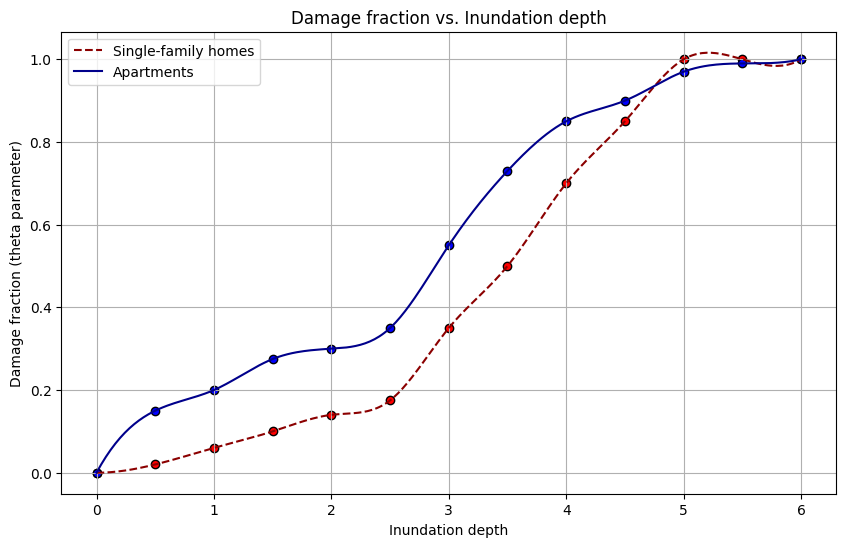

In [2]:

# Data for single-family homes and apartments with refined values and 0.5 steps in inundation depth
data = {
    'Inundation_depth':    [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6],
    'Single_family_homes': [0, 0.02, 0.06, 0.1, 0.14, 0.175, 0.35, 0.5, 0.7, 0.85, 1.0, 1.0, 1.0],
    'Apartments':          [0, 0.15, 0.2, 0.275, 0.3, 0.35, 0.55, 0.73, 0.85, 0.9, 0.97, 0.99, 1.0]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Interpolation
xnew = np.linspace(0, 6, 300)  # 300 represents number of points to make the curve smooth

spl1 = make_interp_spline(df['Inundation_depth'], df['Single_family_homes'], k=3)
spl2 = make_interp_spline(df['Inundation_depth'], df['Apartments'], k=3)

smooth_single_family = spl1(xnew)
smooth_apartments = spl2(xnew)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(xnew, smooth_single_family, label='Single-family homes', color='darkred', linestyle='--')
plt.plot(xnew, smooth_apartments, label='Apartments', color='darkblue', linestyle='-')
plt.scatter(df['Inundation_depth'], df['Single_family_homes'], color='red', edgecolor='black')
plt.scatter(df['Inundation_depth'], df['Apartments'], color='blue', edgecolor='black')
plt.xlabel('Inundation depth')
plt.ylabel('Damage fraction (theta parameter)')
plt.legend()
plt.grid(True)
plt.title('Damage fraction vs. Inundation depth')
plt.show()


## Property damage function from SSM 2017

In [27]:
# Placeholder data
property_data = {
    'property_id': ['property_1', 'property_2', 'property_3', 'property_4'],
    'property_type': ['single_family', 'apartment', 'single_family', 'single_family'],
    'area': [100, 80, 200, 300],
    'inundation_depth': [2.5, 1.8, 3.0, 4.0],
    'property_value': [250000, 200000, 500000, 750000]
}

# Convert to DataFrame
df_properties = pd.DataFrame(property_data)

In [30]:
# Refined damage factor data
damage_data = {
    'Inundation_depth':    [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6],
    'Single_family_homes': [0, 0.02, 0.06, 0.1, 0.14, 0.175, 0.35, 0.5, 0.7, 0.85, 1.0, 1.0, 1.0],
    'Apartments':          [0, 0.15, 0.2, 0.275, 0.3, 0.35, 0.55, 0.73, 0.85, 0.9, 0.97, 0.99, 1.0]
}

# Convert damage data to DataFrame
df_damage_factors = pd.DataFrame(damage_data)

# Function to calculate damage factor (theta)
def calculate_damage_factor(property_type, inundation_depth):
    if property_type == 'single_family':
        return np.interp(inundation_depth, df_damage_factors['Inundation_depth'], df_damage_factors['Single_family_homes'])
    elif property_type == 'apartment':
        return np.interp(inundation_depth, df_damage_factors['Inundation_depth'], df_damage_factors['Apartments'])
    elif property_type == 'office':
        return np.minimum(1, inundation_depth / 4)  # Example linear relationship
    elif property_type == 'industrial':
        return np.minimum(1, inundation_depth / 5)  # Example linear relationship
    else:
        return 0

# Function to calculate property-specific damages
def calculate_property_damage(df, max_damage, pi):
    damages = []
    for index, row in df.iterrows():
        property_type = row['property_type']
        area = row['area']
        inundation_depth = row['inundation_depth']
        theta = calculate_damage_factor(property_type, inundation_depth)
        
        damage = theta * max_damage[property_type] * area * pi
        damages.append(damage)
    df['damage'] = damages
    return df

# Function to calculate financial impact phi
def calculate_financial_impact(df):
    df['phi'] = df.apply(lambda row: min(row['damage'] / row['property_value'], 1), axis=1)
    return df

# Placeholder data
property_test_data = {
    'property_id': ['property_1', 'property_2', 'property_3', 'property_4'],
    'property_type': ['single_family', 'apartment', 'single_family', 'single_family'],
    'area': [100, 80, 200, 300],
    'inundation_depth': [2.5, 1.8, 3.0, 4.0],
    'property_value': [250000, 200000, 500000, 750000]
}

# Convert to DataFrame
df_properties = pd.DataFrame(property_data)

# Maximum damages per property type (in 2011 prices)
max_damage = {
    'single_family': 2500,  # euros per m^2
    'apartment': 1500
}

# Correction factor to adjust 2011 prices to 2020 levels
pi = 1.4



# Calculate damages
df_properties = calculate_property_damage(df_properties, max_damage, pi)

# Calculate financial impact
df_properties = calculate_financial_impact(df_properties)

# Print results
print("Property Damages and Financial Impact:")
print(df_properties)

Property Damages and Financial Impact:
  property_id  property_type  area  inundation_depth  property_value  \
0  property_1  single_family   100               2.5          250000   
1  property_2      apartment    80               1.8          200000   
2  property_3  single_family   200               3.0          500000   
3  property_4  single_family   300               4.0          750000   

     damage     phi  
0   52500.0  0.2100  
1   41760.0  0.2088  
2  210000.0  0.4200  
3  630000.0  0.8400  
